### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 7, 6pm**
BEFORE the beginning of class at 6:00pm
NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team is now equipped with the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.
* NOTE, as opposed to the first three case studies, case study 4 is much more open ended.  
  * Business is the focus
  * All three parts need to appear (Business, Computer Science, and Math)
  * However, the precise balance is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

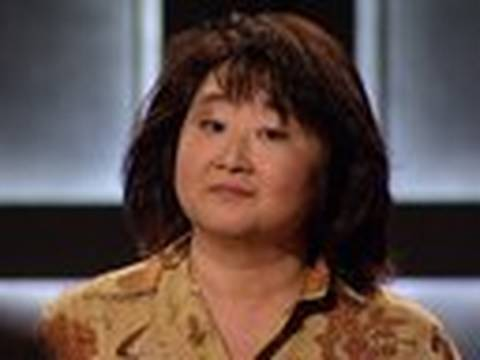

In [16]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

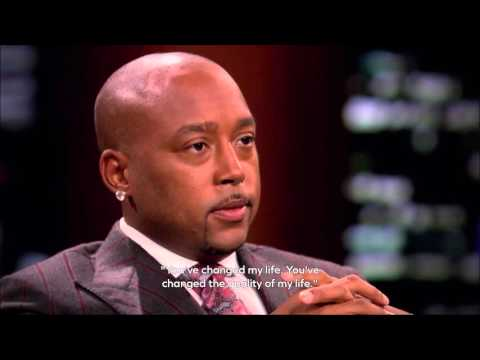

In [17]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






## Load data into Pandas from CSV file and save it into an h5 file

In [2]:
import pandas as pd

data = pd.read_csv('survey_results_public.csv', sep=',', engine='python').applymap(str)

shape = data.shape
print('Data has', shape[0], 'rows and', shape[1], 'columns.')

hdf5 = pd.HDFStore('data.h5', format='table')
hdf5['data'] = data
hdf5.close()

Data has 51392 rows and 154 columns.


### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:

Pearson correlation coefficient ρ(X,Y) = cov(X,Y) / σX*σY, where cov(X,Y) = E[(X-μx)(Y-μy)], and σX is the standard deviation of X.

2) Math Solution:

- Find the correlation between salary and work years.
- Find the correlation between salary and degree.

3) Implementation of the Solution


Correlation  between salary and work year:  0.496210910257


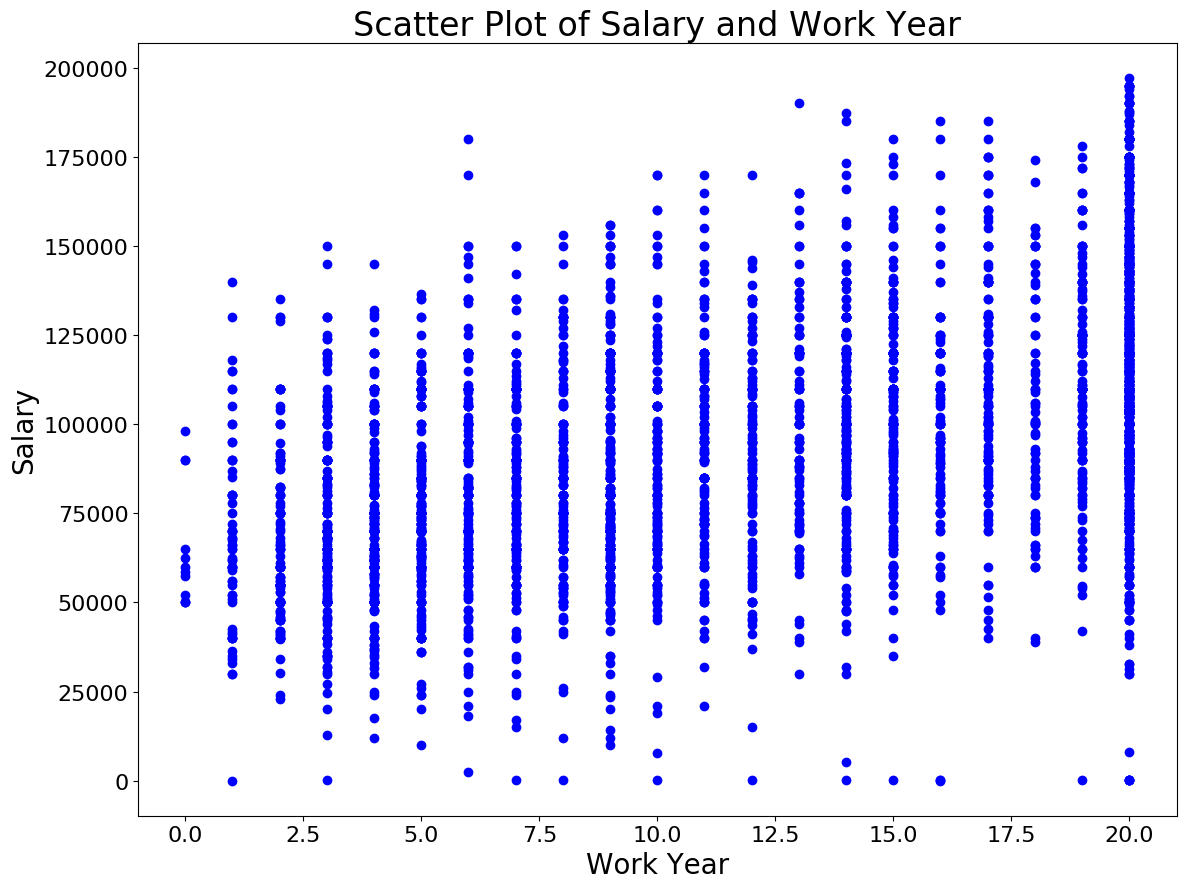

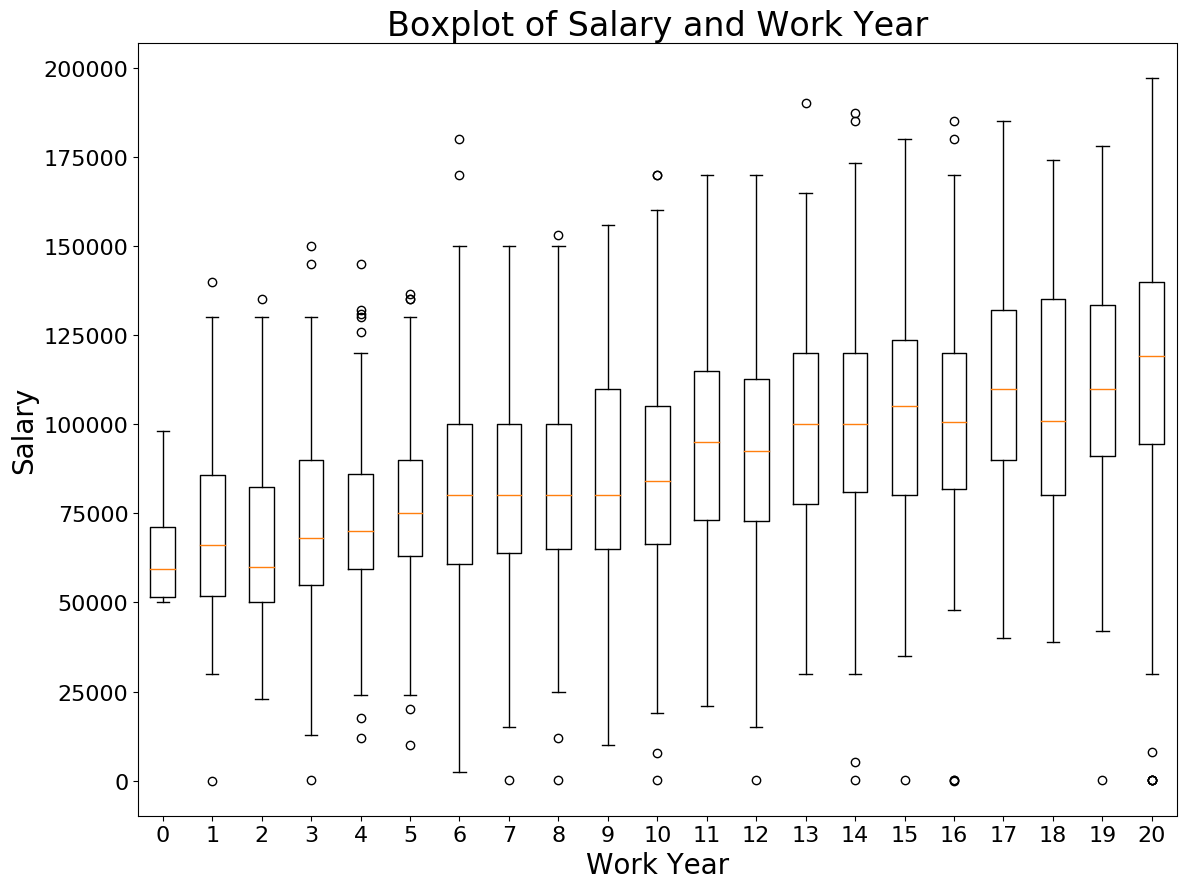

In [45]:
# your code here
import pandas as pd
import numpy
import matplotlib.pyplot as plt

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
filtered_data = us_data[us_data.YearsProgram != 'nan']
filtered_data = filtered_data[filtered_data.Salary != 'nan']

boxplot_data = []
year_list = []
salary_list = []
for year, salary in zip(filtered_data['YearsProgram'], filtered_data['Salary']):
    salary_list.append(float(salary))
    if year.startswith('Less'):
        year_list.append(0)
    else:
        nums = year.split(' ')
        year_list.append(int(nums[0]))
    i=year_list[-1]
    if i >= len(boxplot_data):
        for j in range(i-len(boxplot_data)+1):
            boxplot_data.append([])
    boxplot_data[i].append(float(salary))
print('Correlation  between salary and work year: ', numpy.corrcoef(year_list, salary_list)[0][1])
plt.figure(figsize=(12, 9), dpi=100)
plt.xlabel('Work Year', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(year_list, salary_list, 'bo')
plt.title('Scatter Plot of Salary and Work Year', fontsize=24)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9), dpi=100)
plt.boxplot(boxplot_data)
plt.xlabel('Work Year', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.xticks(numpy.arange(21)+1, [i for i in range(21)],fontsize=16)
plt.yticks(fontsize=16)
plt.title('Boxplot of Salary and Work Year', fontsize=24)
plt.tight_layout()
plt.show()

Correlation  between salary and degree:  0.197232757969


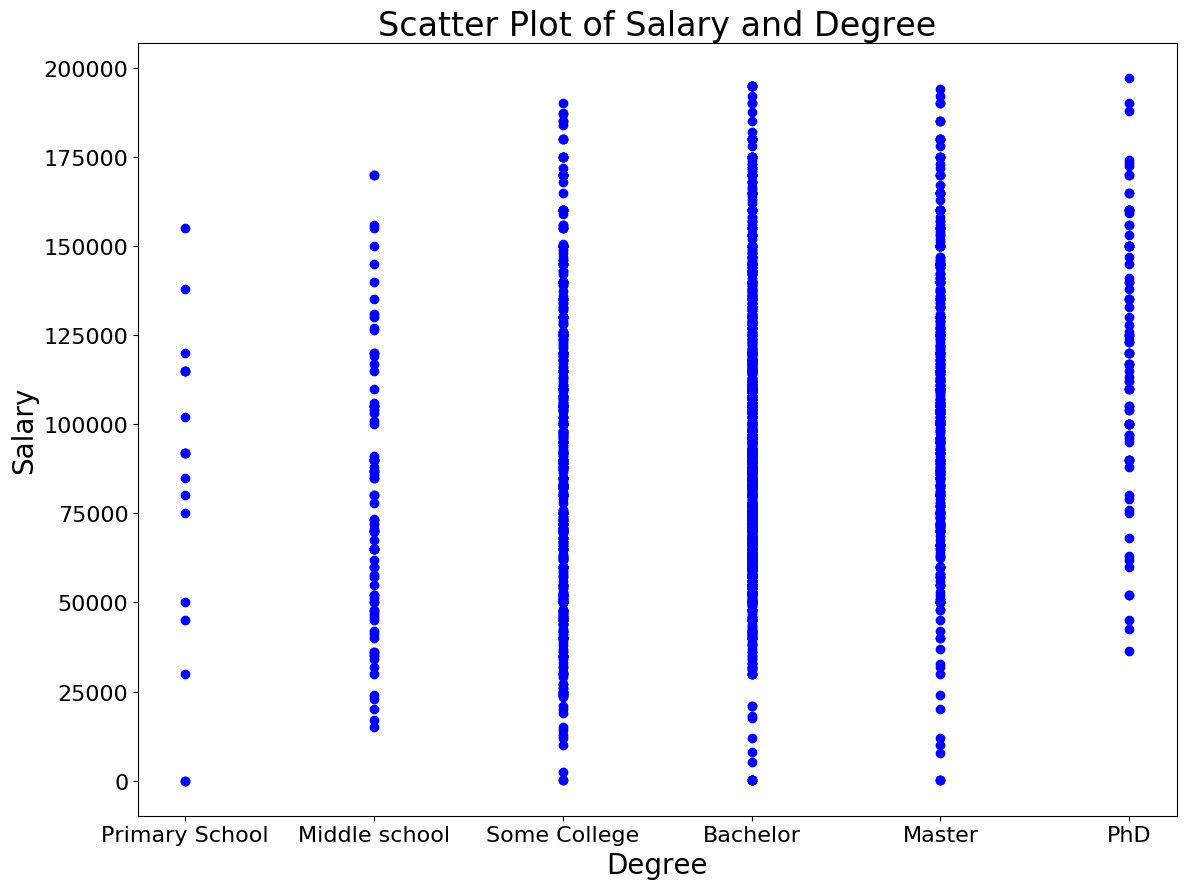

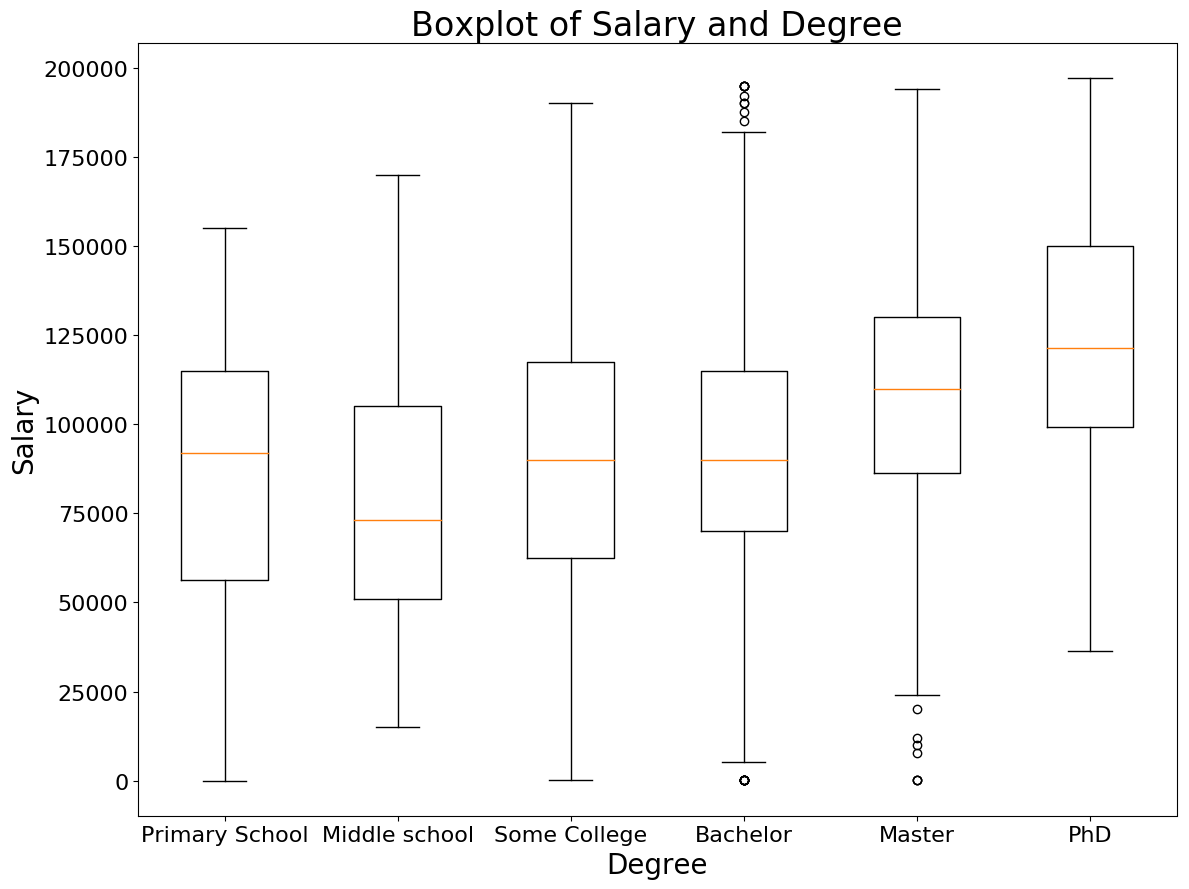

In [26]:
# your code here
import pandas as pd
import numpy
import matplotlib.pyplot as plt

data = pd.read_hdf('data.h5')

degree_dict={'Primary/elementary school':1, 'Secondary school':2, 'Some college/university study without earning a bachelor\'s degree':3,'Bachelor\'s degree':4, 'Master\'s degree':5, 'Doctoral degree':6}
label_list=['Primary School', 'Middle school', 'Some College', 'Bachelor', 'Master', 'PhD']


us_data = data[data.Country == 'United States']
filtered_data = us_data[us_data.FormalEducation != 'nan']
filtered_data = filtered_data[filtered_data.Salary != 'nan']

boxplot_data = [[],[],[],[],[],[]]
degree_list = []
salary_list = []
for degree, salary in zip(filtered_data['FormalEducation'], filtered_data['Salary']):
    if degree in degree_dict:
        degree_list.append(degree_dict[degree])
        salary_list.append(float(salary))
        boxplot_data[list(degree_dict.keys()).index(degree)].append(float(salary))
print('Correlation  between salary and degree: ', numpy.corrcoef(degree_list, salary_list)[0][1])
plt.figure(figsize=(12, 9), dpi=100)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.xticks(numpy.arange(6)+1, label_list, fontsize=16)
plt.yticks(fontsize=16)
plt.plot(degree_list, salary_list, 'bo')
plt.title('Scatter Plot of Salary and Degree', fontsize=24)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9), dpi=100)
plt.boxplot(boxplot_data)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.xticks(numpy.arange(6)+1, label_list, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Boxplot of Salary and Degree', fontsize=24)
plt.tight_layout()
plt.show()

# The Salary Estimation based on Neural Networks


* The following code developed a salary estimating system based on Neural Networks. Due to the number of data instance, this only works for programmers in USA. I manual select 10 raw attributes to predict the salary (5 numeric and 5 categorical). After applied the dummy variables there are 66 attributes in total. 

* This can be used for software engineers to check whether they have been underpaid or over paid. This can also be used as a small interesting plug-in to let user motivate themself by reaching the high salary stadard to achieve their goals. 

* The proformance seems satisfied, the mse of each cross-validation stays steady at $60000000 with this no-aimed at salary estmating dataset.


**Data preprocessing:**

In [ ]:
import csv

jobs = [' Desktop applications developer', ' Developer with a statistics or mathematics background',
        'Desktop applications developer', ' Data scientist', 'Other', ' Graphics programming',
        'Developer with a statistics or mathematics background', ' Graphic designer', ' Database administrator',
        'Embedded applications/devices developer', 'NA', ' Quality assurance engineer',
        ' Embedded applications/devices developer', 'Graphic designer', ' Other', 'DeveloperType',
        'Machine learning specialist', 'Mobile developer', 'Web developer', ' DevOps specialist',
        ' Systems administrator', 'Data scientist', 'DevOps specialist', ' Machine learning specialist',
        'Database administrator', ' Mobile developer', 'Systems administrator', 'Quality assurance engineer',
        'Graphics programming']

with open('survey_results_public.csv', 'r') as csvinput:
    with open('SalaryRegression.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        for row in csv.reader(csvinput):
            tofill = []
            tofill.append(float(row[152]))  # salary
            tofill.append(row[6])  # formal education
            tofill.append(row[10])  # company type
            tofill.append(row[80])  # overpaid

            if row[48] == "NA":  # last new job
                tofill.append("na")
            else:
                tofill.append(row[48])
            job = row[14].split(";")

            for i in range(29):  # developer type
                if jobs[i] in job:
                    tofill.append(1)
                else:
                    tofill.append(0)

            if row[9].split()[0].isalpha():
                tofill.append(5)
            else:
                tofill.append(int(row[9].split()[0].replace(',', '')))
            if row[11].split()[0].isalpha():
                tofill.append(0)
            else:
                tofill.append(row[11].split()[0])

            tofill.append(row[18])  # career
            tofill.append(row[19])  # job
            tofill.append(row[127])  # stackOverflow

            if "NA" not in tofill and "United States" in tofill:
                writer.writerow(tofill)

**The training, testing, and proformance of the neural-network regressor.**

In [4]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def create_dummy(dataframe, col_num):
    dummies = pd.get_dummies(dataframe[col_num])
    df = pd.concat([dataframe, dummies], axis=1)
    del df[col_num]
    return df


# load dataset
dataframe = pd.read_csv("SalaryRegression.csv", delimiter=",", header=None)

dataframe = create_dummy(dataframe, 1)
dataframe = create_dummy(dataframe, 2)
dataframe = create_dummy(dataframe, 3)
dataframe = create_dummy(dataframe, 4)

dataset = dataframe.values
# split into input (X) and output (Y) variables

X = dataset[:, :]
Y = dataset[:, 0]


# define model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=66, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
print("The MSE of each cross validation:")
print(results)
print("The MEAN and MSE of above array:")
print("%.2f (%.2f) MSE" % (results.mean(), results.std()))

The MSE of each cross validation:
[ -3.09715770e+07  -6.75343376e+07  -5.03692606e+07  -6.63210845e+07
  -1.31435860e+08  -5.67384590e+07  -4.87109917e+07  -4.47312817e+07
  -4.80112608e+07  -6.89810498e+07]
The MEAN and MSE of above array:
-61380516.31 (25907043.42) MSE


### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

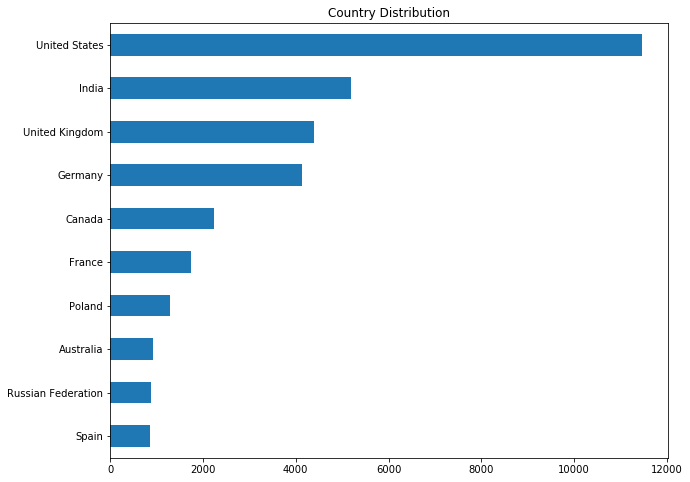

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_hdf('data.h5')
data['Country'].value_counts()[0:10][::-1].plot(kind='barh',figsize=(10,8))
plt.title('Country Distribution')
plt.show()

In [22]:
import pandas as pd
data = pd.read_hdf('data.h5')

us_data = data[data.Country=='United States']
shape = us_data.shape
print('Data in US has', shape[0], 'rows and', shape[1], 'columns.')

Data in US has 11455 rows and 154 columns.


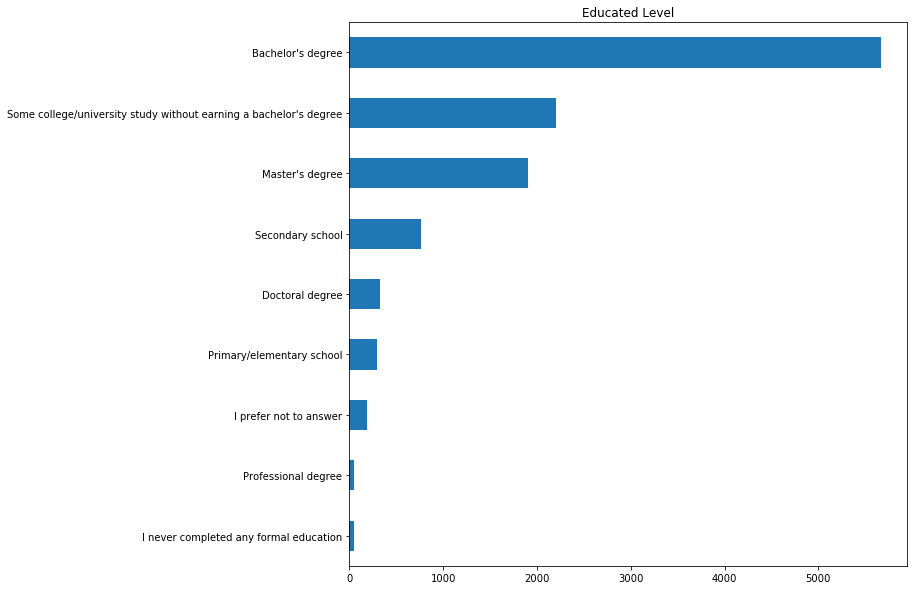

In [46]:
us_data['FormalEducation'].value_counts()[0:10][::-1].plot(kind='barh',figsize=(10,10))
plt.title('Educated Level')
plt.show()

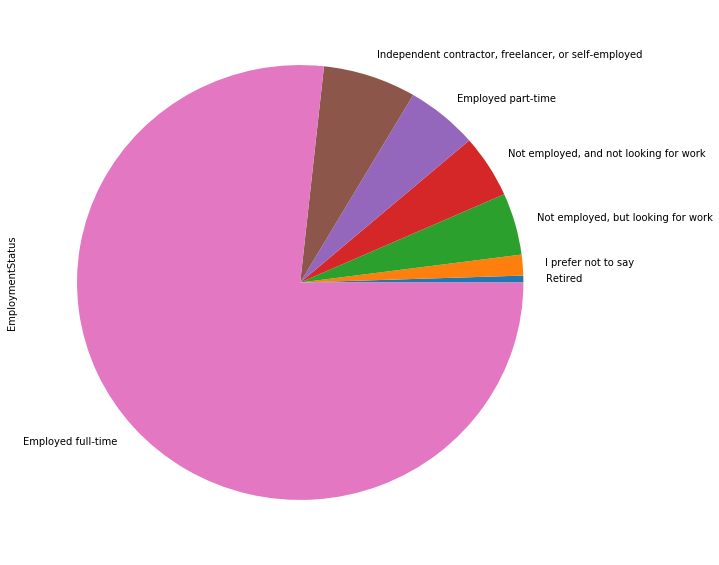

In [31]:
us_data['EmploymentStatus'].value_counts()[0:10][::-1].plot(kind='pie',figsize=(10,10))
plt.show()

Data in US has 11455 rows and 154 columns.
+--------------------------------+-------+
|              Type              | Count |
+--------------------------------+-------+
|        Graphic designer        |  285  |
|  Machine learning specialist   |  311  |
|      Graphics programming      |  319  |
|   Quality assurance engineer   |  339  |
|         Data scientist         |  711  |
|      Embedded developer        |  726  |
|             Other              |  860  |
|     Systems administrator      |  954  |
| Developer with math background |  989  |
|       DevOps specialist        |  1045 |
|     Database administrator     |  1188 |
|        Mobile developer        |  1539 |
| Desktop applications developer |  2306 |
|         Web developer          |  5998 |
+--------------------------------+-------+


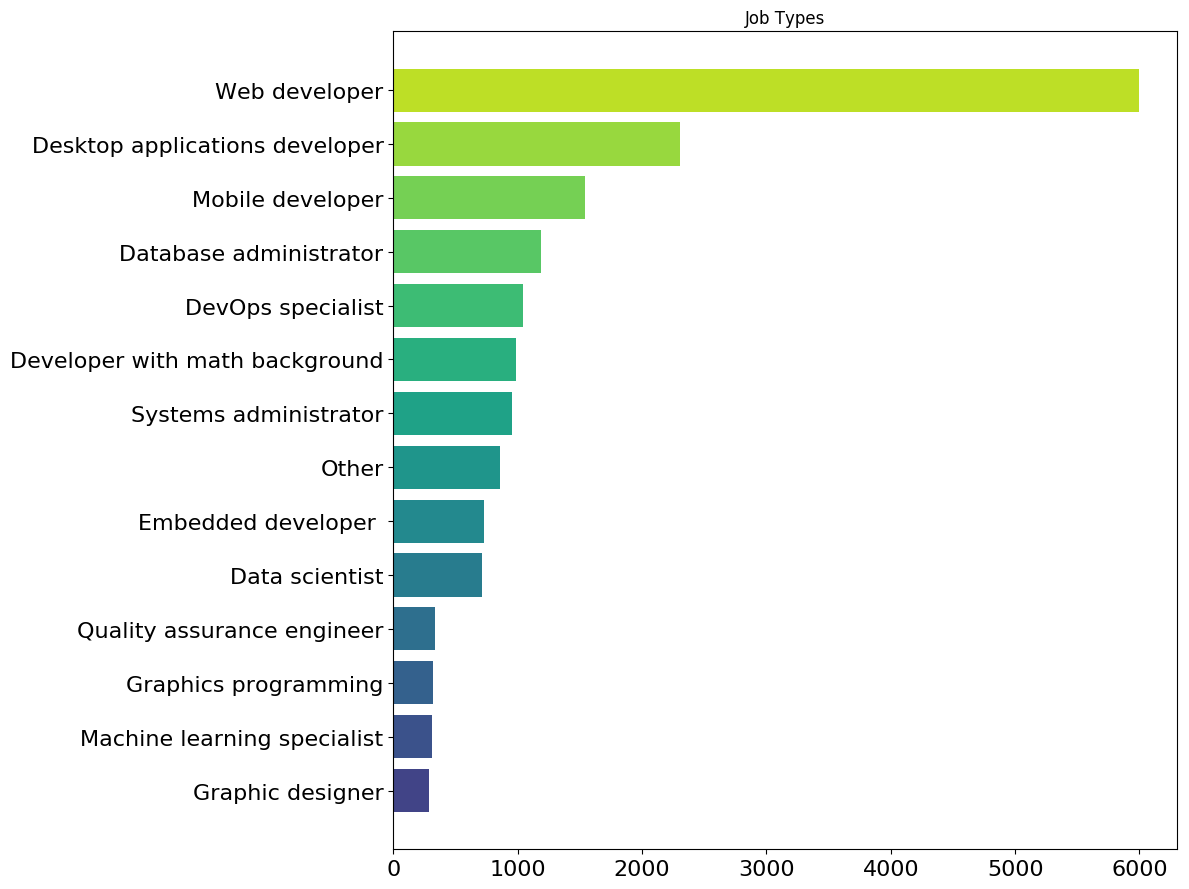

In [44]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
shape = us_data.shape
print('Data in US has', shape[0], 'rows and', shape[1], 'columns.')
types_data = us_data[us_data.DeveloperType != 'nan']
stat_dict = {}
for row in types_data['DeveloperType']:
    types = row.split('; ')
    for i in types:
        if i == 'Developer with a statistics or mathematics background':
            i = 'Developer with math background'
        if i == 'Embedded applications/devices developer':
            i = 'Embedded developer '
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Type', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('viridis')
colors = [cm(i) for i in np.linspace(0.2, 0.9, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Job Types')
plt.tight_layout()
plt.show()

## Exploration on Web Developer

Since web development is the most popular job type, we decided to explore more on it.

+------------+-------+
|  Language  | Count |
+------------+-------+
|     C      |  490  |
|    C++     |  577  |
| TypeScript |  711  |
|    Ruby    |  768  |
|    PHP     |  1267 |
|   Python   |  1485 |
|    Java    |  1750 |
|     C#     |  2053 |
|    SQL     |  3064 |
| JavaScript |  4186 |
+------------+-------+


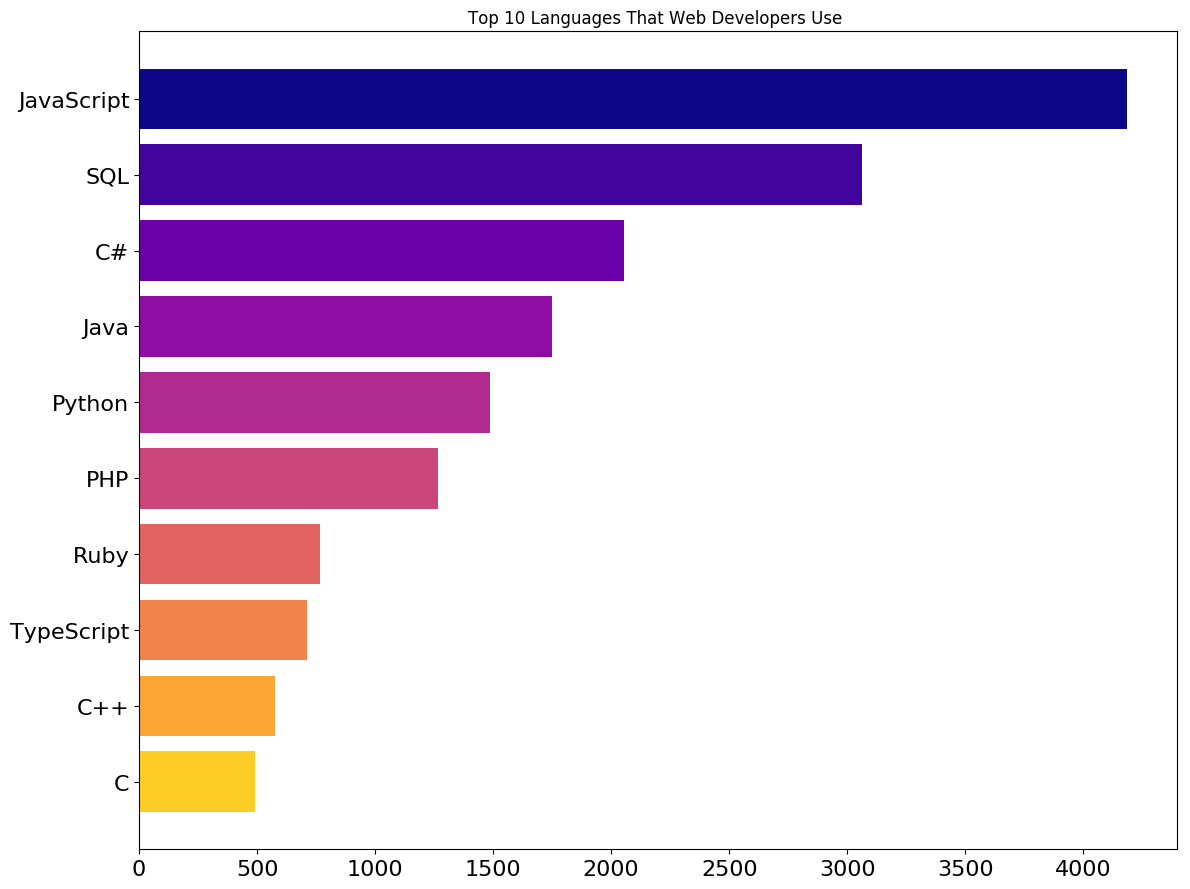

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
web_data = us_data[us_data.DeveloperType.str.contains("Web")]
lang_data = web_data[web_data.HaveWorkedLanguage != 'nan']
stat_dict = {}
for row in lang_data['HaveWorkedLanguage']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Language', 'Count'])
keys = []
values = []
for item in sorted_list[-10:]:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('plasma_r')
colors = [cm(i) for i in np.linspace(0.1, 1.0, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Languages That Web Developers Use ')
plt.tight_layout()
plt.show()

+-----------+-------+
| Framework | Count |
+-----------+-------+
|   Spark   |  129  |
|   Hadoop  |  146  |
|  Firebase |  227  |
|  Xamarin  |  265  |
|  Cordova  |  276  |
|   React   |  915  |
| .NET Core |  1143 |
| AngularJS |  1759 |
|  Node.js  |  1794 |
+-----------+-------+


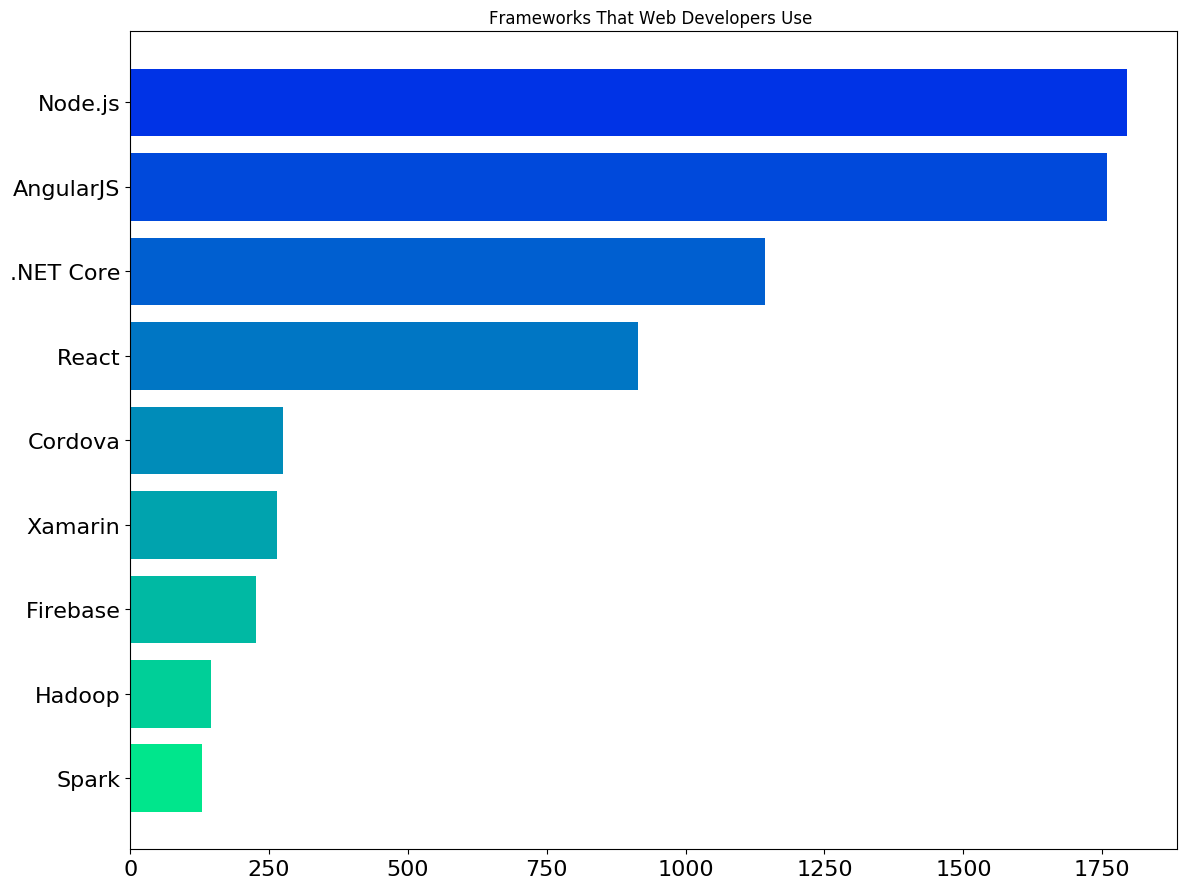

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
web_data = us_data[us_data.DeveloperType.str.contains("Web")]
fw_data = web_data[web_data.HaveWorkedFramework != 'nan']
stat_dict = {}
for row in fw_data['HaveWorkedFramework']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Framework', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('winter_r')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Frameworks That Web Developers Use ')
plt.tight_layout()
plt.show()

+------------+-------+
|  Database  | Count |
+------------+-------+
| Cassandra  |  172  |
|   Oracle   |  608  |
|   Redis    |  805  |
|   SQLite   |  889  |
|  MongoDB   |  926  |
| PostgreSQL |  1315 |
|   MySQL    |  2079 |
| SQL Server |  2106 |
+------------+-------+


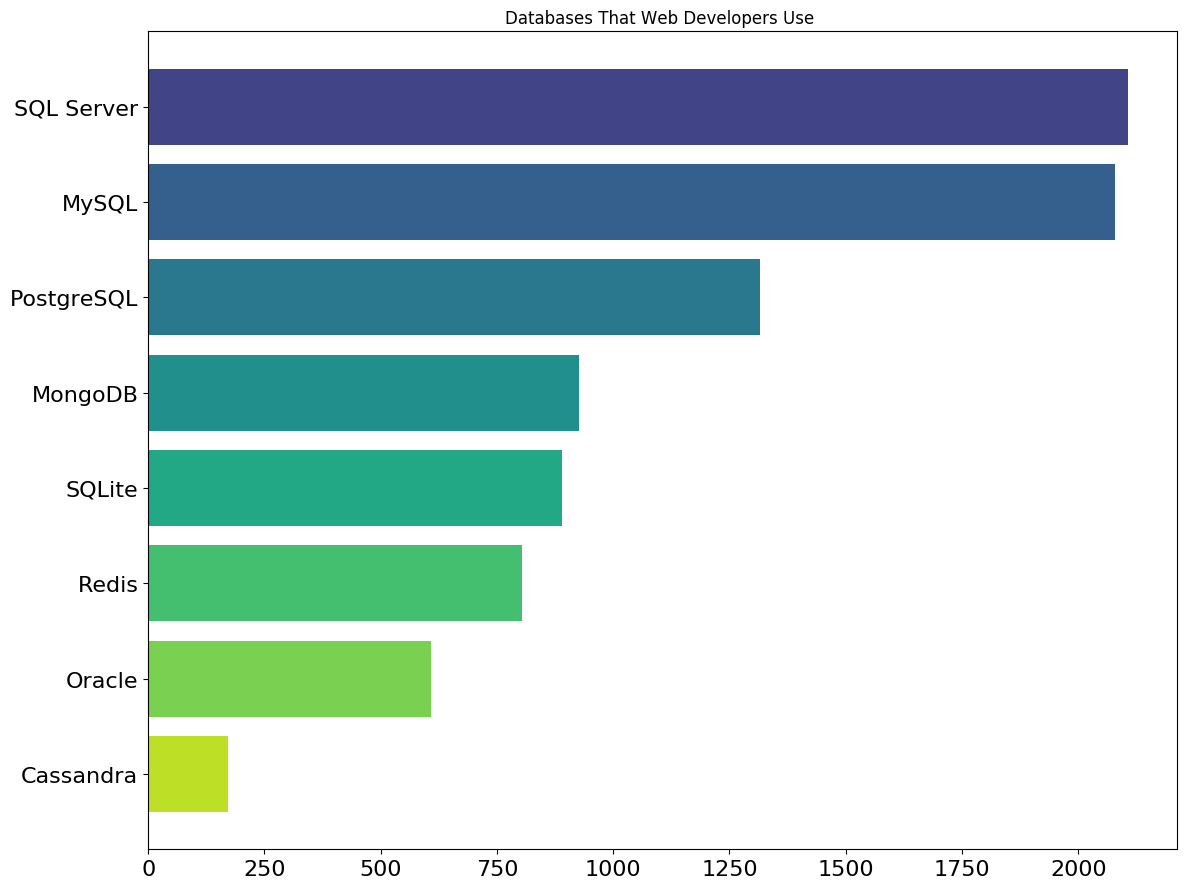

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
web_data = us_data[us_data.DeveloperType.str.contains("Web")]
db_data = web_data[web_data.HaveWorkedDatabase != 'nan']
stat_dict = {}
for row in db_data['HaveWorkedDatabase']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Database', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('viridis_r')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Databases That Web Developers Use ')
plt.tight_layout()
plt.show()

+-----------------+-------+
|     Platform    | Count |
+-----------------+-------+
|    Mainframe    |   56  |
|  Windows Phone  |   95  |
|    Serverless   |  161  |
|    SharePoint   |  186  |
|    Salesforce   |  221  |
|     Arduino     |  306  |
|   Raspberry Pi  |  582  |
| Microsoft Azure |  661  |
|    WordPress    |  679  |
|       iOS       |  706  |
|     Android     |  775  |
|      Mac OS     |  923  |
|  Linux Desktop  |  926  |
| Windows Desktop |  1245 |
|       AWS       |  1837 |
+-----------------+-------+


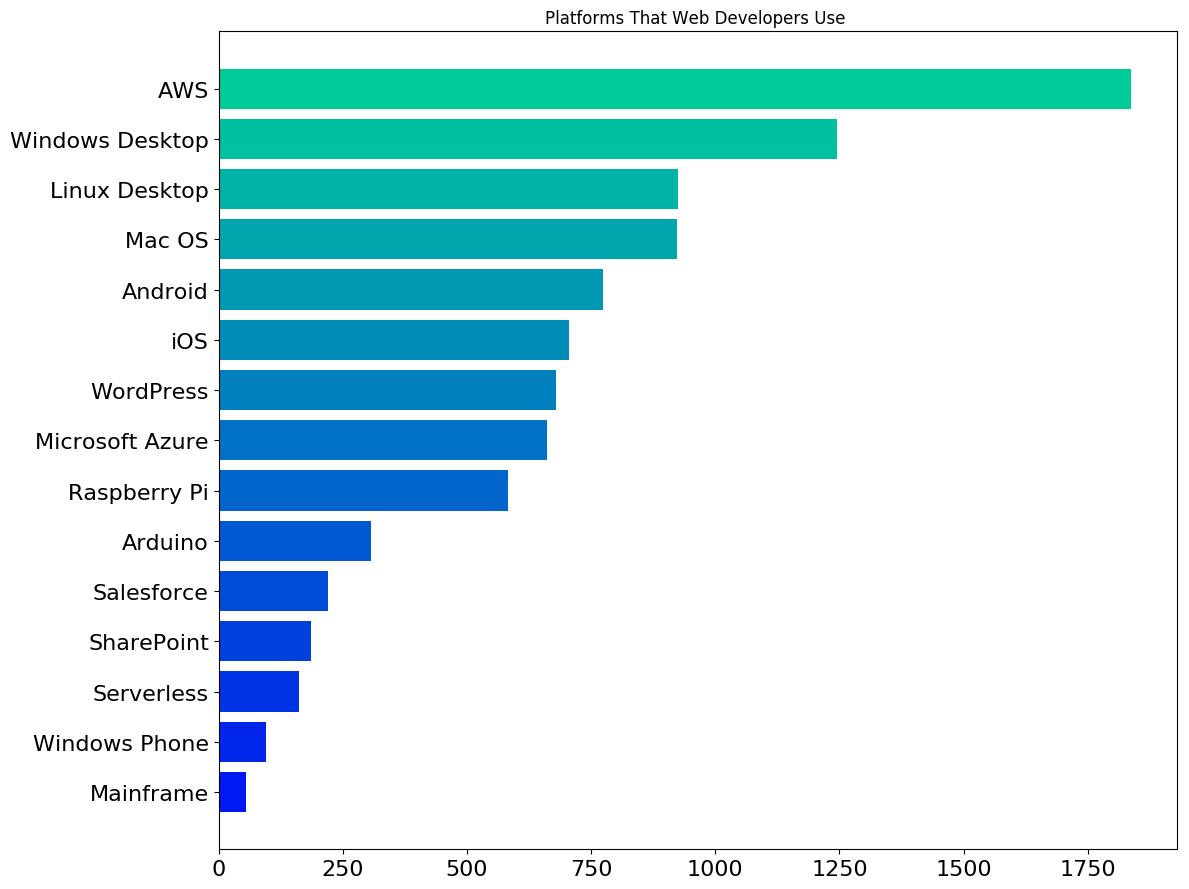

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
web_data = us_data[us_data.DeveloperType.str.contains("Web")]
plat_data = web_data[web_data.HaveWorkedPlatform != 'nan']
stat_dict = {}
for row in plat_data['HaveWorkedPlatform']:
    types = row.split('; ')
    for i in types:
        if i == 'Amazon Web Services (AWS)':
            i = 'AWS'
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Platform', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('winter')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Platforms That Web Developers Use ')
plt.tight_layout()
plt.show()

+--------------------+-------+
|        IDE         | Count |
+--------------------+-------+
|    Light Table     |   8   |
|        Zend        |   11  |
|       Komodo       |   32  |
|        Coda        |   44  |
|      RStudio       |   78  |
|      TextMate      |   87  |
|      RubyMine      |  119  |
| IPython / Jupyter  |  193  |
|      NetBeans      |  193  |
|       Emacs        |  293  |
|      PHPStorm      |  295  |
|      PyCharm       |  342  |
|   Android Studio   |  480  |
|       Xcode        |  515  |
|      Eclipse       |  820  |
|        Atom        |  1010 |
|      IntelliJ      |  1034 |
| Visual Studio Code |  1173 |
|     Notepad++      |  1425 |
|    Sublime Text    |  1500 |
|        Vim         |  1576 |
|   Visual Studio    |  2108 |
+--------------------+-------+


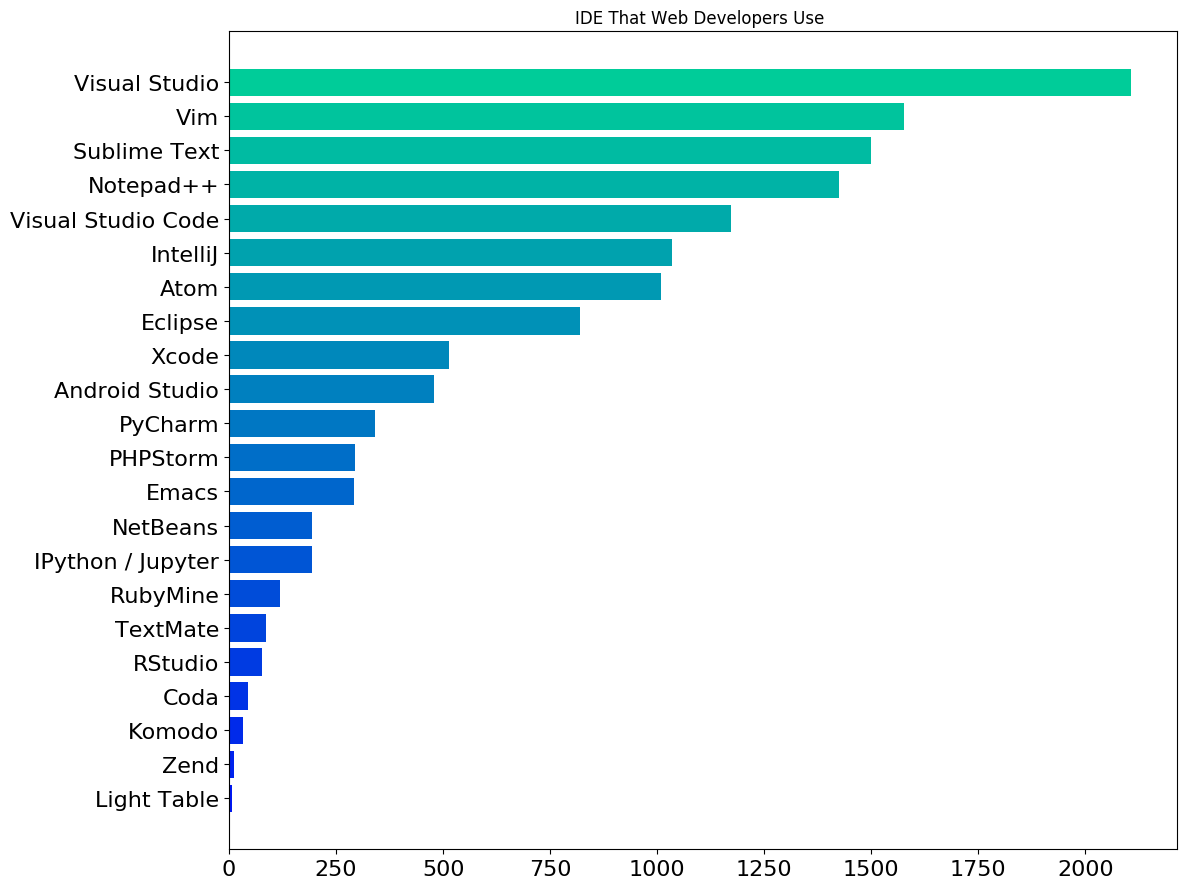

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
web_data = us_data[us_data.DeveloperType.str.contains("Web")]
ide_data = web_data[web_data.IDE != 'nan']
stat_dict = {}
for row in ide_data['IDE']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['IDE', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('winter')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('IDE That Web Developers Use ')
plt.tight_layout()
plt.show()

---
## Exploration on Programming Languages

+----------------+-------+
|    Language    | Count |
+----------------+-------+
|      Hack      |   27  |
|      Dart      |   39  |
|     Julia      |   42  |
|     Erlang     |   61  |
|  Common Lisp   |   71  |
|   Smalltalk    |   83  |
|     Elixir     |  102  |
|       F#       |  112  |
|    Clojure     |  120  |
|      Rust      |  128  |
|    Haskell     |  145  |
| Visual Basic 6 |  233  |
|      Lua       |  253  |
|  CoffeeScript  |  304  |
|     Groovy     |  315  |
|     Scala      |  345  |
|     Matlab     |  380  |
|      VBA       |  404  |
|    Assembly    |  418  |
|       Go       |  473  |
|       R        |  538  |
|      Perl      |  560  |
|     VB.NET     |  611  |
|  Objective-C   |  655  |
|     Swift      |  692  |
|   TypeScript   |  832  |
|      Ruby      |  1123 |
|       C        |  1534 |
|      PHP       |  1827 |
|      C++       |  1837 |
|       C#       |  3100 |
|      Java      |  3191 |
|     Python     |  3348 |
|      SQL       |  4589 |
|

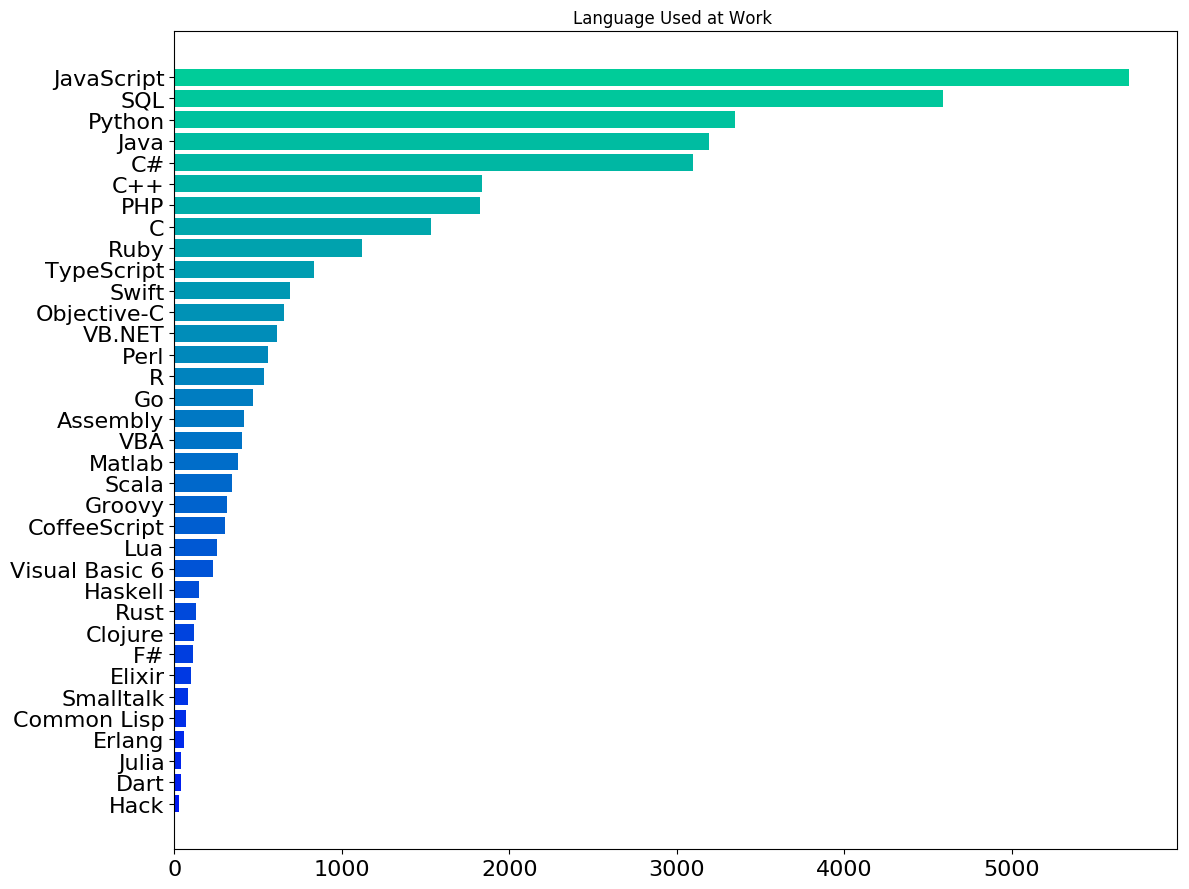

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
lang_data = us_data[us_data.HaveWorkedLanguage!= 'nan']
stat_dict = {}
for row in lang_data['HaveWorkedLanguage']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Language', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('winter')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Language Used at Work ')
plt.tight_layout()
plt.show()

+----------------+-------+
|    Language    | Count |
+----------------+-------+
| Visual Basic 6 |   48  |
|      Hack      |   57  |
|      VBA       |   99  |
|   Smalltalk    |  122  |
|      Dart      |  129  |
|     Julia      |  157  |
|     VB.NET     |  174  |
|  Common Lisp   |  198  |
|     Matlab     |  219  |
|     Groovy     |  224  |
|  CoffeeScript  |  235  |
|     Erlang     |  257  |
|      Lua       |  295  |
|      Perl      |  318  |
|    Clojure     |  415  |
|     Elixir     |  435  |
|  Objective-C   |  442  |
|    Assembly    |  498  |
|    Haskell     |  586  |
|       F#       |  615  |
|     Scala      |  736  |
|       R        |  800  |
|      Rust      |  800  |
|      PHP       |  899  |
|      Ruby      |  1094 |
|       C        |  1241 |
|     Swift      |  1299 |
|   TypeScript   |  1366 |
|       Go       |  1585 |
|      C++       |  1834 |
|      Java      |  2094 |
|       C#       |  2610 |
|      SQL       |  2785 |
|     Python     |  3346 |
|

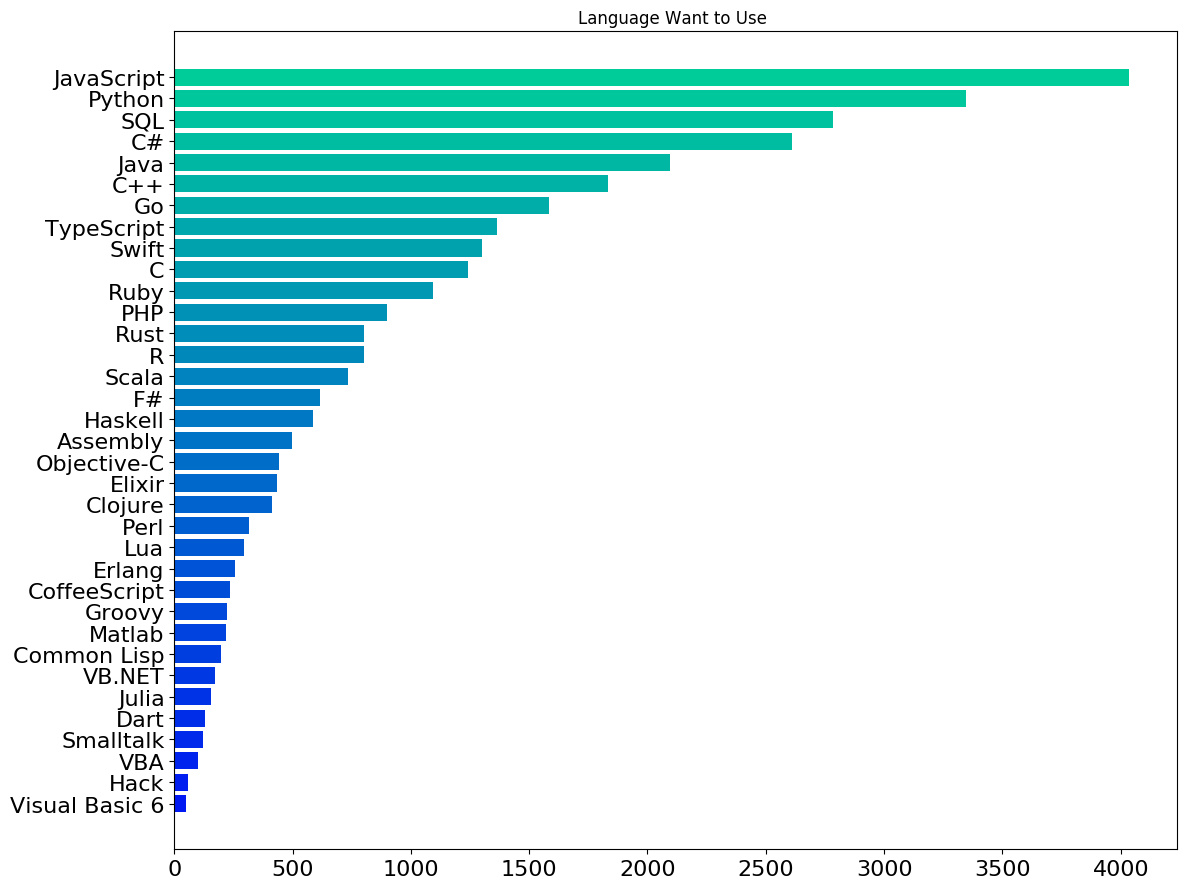

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
lang_data = us_data[us_data.WantWorkLanguage!= 'nan']
stat_dict = {}
for row in lang_data['WantWorkLanguage']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Language', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('winter')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Language Want to Use ')
plt.tight_layout()
plt.show()

---
## Exploration on Frameworks

+-----------+-------+
| Framework | Count |
+-----------+-------+
|   Spark   |  287  |
|   Hadoop  |  325  |
|  Cordova  |  337  |
|  Firebase |  360  |
|  Xamarin  |  396  |
|   React   |  1132 |
| .NET Core |  1793 |
| AngularJS |  2130 |
|  Node.js  |  2411 |
+-----------+-------+


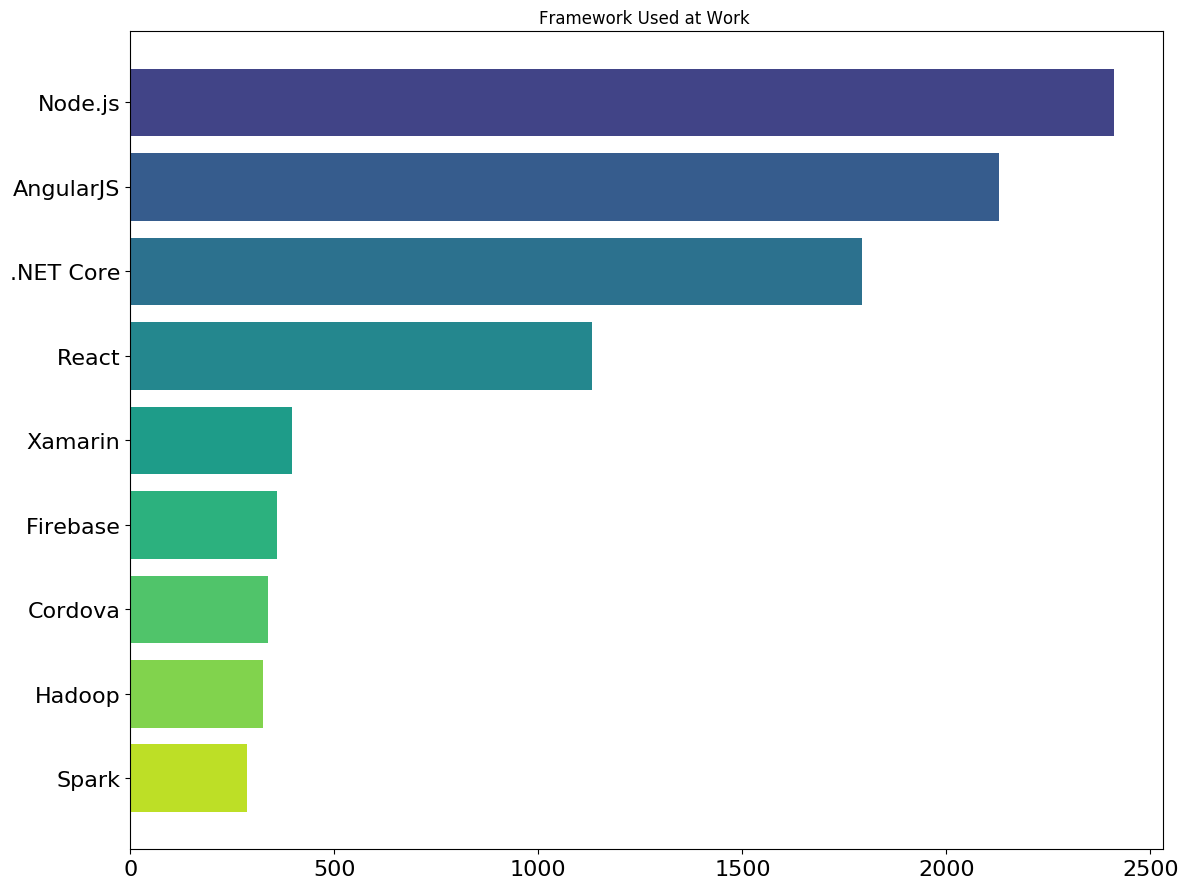

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
lang_data = us_data[us_data.HaveWorkedFramework!= 'nan']
stat_dict = {}
for row in lang_data['HaveWorkedFramework']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Framework', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('viridis_r')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Framework Used at Work ')
plt.tight_layout()
plt.show()

+-----------+-------+
| Framework | Count |
+-----------+-------+
|  Cordova  |  332  |
|  Firebase |  530  |
|   Spark   |  663  |
|   Hadoop  |  841  |
|  Xamarin  |  898  |
| .NET Core |  2089 |
| AngularJS |  2256 |
|   React   |  2298 |
|  Node.js  |  2934 |
+-----------+-------+


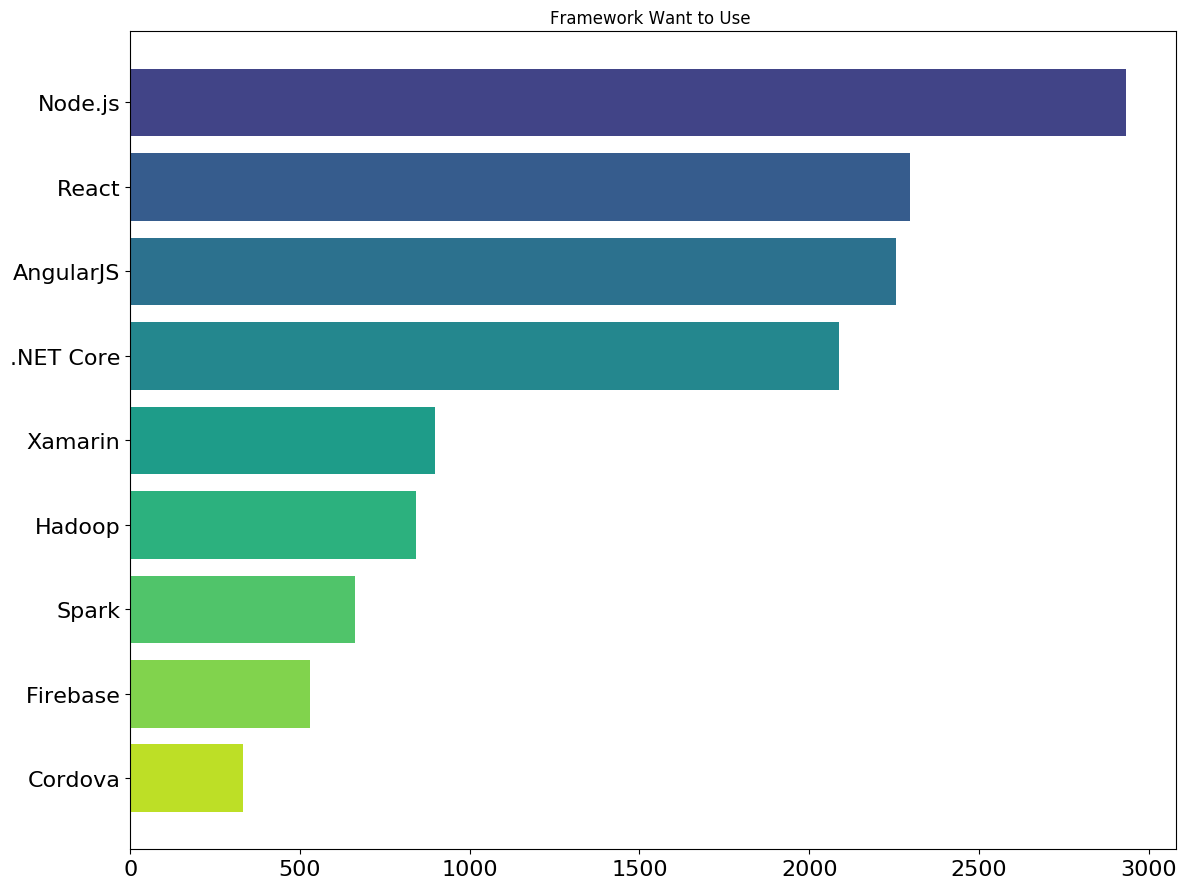

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import operator

data = pd.read_hdf('data.h5')

us_data = data[data.Country == 'United States']
lang_data = us_data[us_data.WantWorkFramework!= 'nan']
stat_dict = {}
for row in lang_data['WantWorkFramework']:
    types = row.split('; ')
    for i in types:
        if i in stat_dict:
            stat_dict[i] += 1
        else:
            stat_dict[i] = 1
sorted_list = sorted(stat_dict.items(), key=operator.itemgetter(1))
table = PrettyTable(['Framework', 'Count'])
keys = []
values = []
for item in sorted_list:
    table.add_row([item[0], item[1]])
    keys.append(item[0])
    values.append(item[1])
print(table)
plt.figure(figsize=(12, 9), dpi=100)
cm = plt.cm.get_cmap('viridis_r')
colors = [cm(i) for i in np.linspace(0.1, 0.8, len(keys))]
plt.barh(range(len(values)), values, align='center', color=colors)
plt.yticks(range(len(keys)), keys)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Framework Want to Use ')
plt.tight_layout()
plt.show()

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **